In [144]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Carga de datos y exploración inicial
- Cargo el archivo excel con todas las hojas al mismo tiempo

In [145]:
Internet = '../datasets/Internet.xlsx'
data = pd.read_excel(Internet, sheet_name=None)

- Realizo una copia del dataset

In [146]:
data_copy = data.copy()

- Exploro el diccionario con todas las hojas guardadas

In [147]:
data_copy.keys()

dict_keys(['Acc_vel_loc_sinrangos', 'Velocidad_sin_Rangos', 'Accesos_tecnologia_localidad', 'Velocidad % por prov', 'Totales VMD', 'Totales Accesos Por Tecnología', 'Accesos Por Tecnología', 'Penetración-poblacion', 'Penetracion-hogares', 'Penetracion-totales', 'Totales Accesos por velocidad', 'Accesos por velocidad', 'Dial-BAf', 'Totales Dial-BAf', 'Ingresos '])

Importo el archivo 'mapa_conectividad' para trabajar con 2 hojas del dataset 'Internet'

In [148]:
df_mapa = pd.read_csv('../datasets/procesado/mapa_conectividad.csv')

In [149]:
df_mapa

,provincia,partido,localidad,poblacion,adsl,cablemodem,dial_up,fibra_optica,satelital,wireless,telefonia_fija,3g,4g,link_indec,latitud,longitud
0,buenos_aires,25_de_mayo,25_de_mayo,23408,SI,SI,NO,NO,SI,SI,SI,SI,SI,6854100,-35.433939,-60.173121
1,buenos_aires,25_de_mayo,agustin_mosconi,280,NO,NO,NO,NO,NO,NO,SI,NO,NO,6854010,-35.739217,-60.559063
2,buenos_aires,25_de_mayo,del_valle,899,SI,NO,NO,NO,SI,NO,NO,SI,NO,6854020,-35.897345,-60.731609
3,buenos_aires,25_de_mayo,ernestina,145,SI,NO,NO,NO,NO,NO,SI,NO,NO,6854030,-35.270234,-59.557503
4,buenos_aires,25_de_mayo,gobernador_ugarte,547,NO,NO,NO,NO,NO,SI,NO,NO,NO,6854040,-35.164397,-60.081358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4288,santa_fe,general_lopez,wheelwright,5733,NO,SI,NO,SI,SI,SI,SI,SI,SI,82042310,-33.794294,-61.211441
4289,santa_fe,general_obligado,arroyo_ceibal,622,NO,NO,NO,NO,NO,SI,SI,NO,SI,82049010,-28.725087,-59.480416
4290,santa_fe,general_obligado,avellaneda_est_ewald,23341,SI,NO,NO,SI,NO,SI,SI,SI,SI,82049020,-29.119366,-59.659251
4291,santa_fe,general_obligado,berna,629,NO,NO,NO,NO,NO,SI,SI,NO,SI,82049030,-29.275268,-59.847222


### Accedo a la primera y tercera hoja

In [150]:
df_1 = data_copy['Acc_vel_loc_sinrangos']
df_3 = data_copy['Accesos_tecnologia_localidad']
print(df_1.head())
print(df_3.head())

      Provincia     Partido          Localidad Link Indec  Otros  0,256 Mbps  \
0  BUENOS AIRES  25 de Mayo         25 de Mayo    6854100    NaN         NaN   
1  BUENOS AIRES  25 de Mayo    Agustín Mosconi    6854010    NaN         NaN   
2  BUENOS AIRES  25 de Mayo          Del Valle    6854020    NaN         NaN   
3  BUENOS AIRES  25 de Mayo          Ernestina    6854030    NaN         NaN   
4  BUENOS AIRES  25 de Mayo  Gobernador Ugarte    6854040    NaN         NaN   

   0,5 Mbps  0,512 Mbps  0,75 Mbps  1 Mbps  ...  680 Mbps  700 Mbps  800 Mbps  \
0       2.0         NaN       19.0     NaN  ...       NaN       NaN       NaN   
1       NaN         NaN        NaN     NaN  ...       NaN       NaN       NaN   
2       1.0         NaN        NaN     NaN  ...       NaN       NaN       NaN   
3       NaN         NaN        NaN     NaN  ...       NaN       NaN       NaN   
4       NaN         NaN        NaN     NaN  ...       NaN       NaN       NaN   

   850 Mbps  900 Mbps  999 Mbps 

In [151]:
df_mapa.head()

,provincia,partido,localidad,poblacion,adsl,cablemodem,dial_up,fibra_optica,satelital,wireless,telefonia_fija,3g,4g,link_indec,latitud,longitud
0,buenos_aires,25_de_mayo,25_de_mayo,23408,SI,SI,NO,NO,SI,SI,SI,SI,SI,6854100,-35.433939,-60.173121
1,buenos_aires,25_de_mayo,agustin_mosconi,280,NO,NO,NO,NO,NO,NO,SI,NO,NO,6854010,-35.739217,-60.559063
2,buenos_aires,25_de_mayo,del_valle,899,SI,NO,NO,NO,SI,NO,NO,SI,NO,6854020,-35.897345,-60.731609
3,buenos_aires,25_de_mayo,ernestina,145,SI,NO,NO,NO,NO,NO,SI,NO,NO,6854030,-35.270234,-59.557503
4,buenos_aires,25_de_mayo,gobernador_ugarte,547,NO,NO,NO,NO,NO,SI,NO,NO,NO,6854040,-35.164397,-60.081358


- Verifico las dimenciones

In [152]:
print(df_1.shape)
print(df_3.shape)
print(df_mapa.shape)

(3065, 125)
(3352, 13)
(4293, 16)


- Verifico el rango y tipos de datos

# Limpieza de datos

- *Valores faltantes:* Identifico columnas con valores faltantes para definir una estrategia

In [153]:
# Reviso los valores faltantes

valfalt_1 = df_1.isna().sum()
valfalt_3 = df_3.isna().sum()
print(valfalt_1[valfalt_1 > 0])
print(valfalt_3[valfalt_3 > 0])

Otros         2035
0,256 Mbps    3029
0,5 Mbps      2423
0,512 Mbps    2540
0,75 Mbps     2781
              ... 
999 Mbps      3048
1000 Mbps     2645
1024 Mbps     3063
4000 Mbps     3064
10000 Mbps    3063
Length: 121, dtype: int64
Provincia     280
Partido       280
Localidad     280
Link Indec    280
dtype: int64


En el df de la hoja 2 elimino las filas que contenian valores faltante

In [154]:
df_3_limpio = df_3.dropna()

In [155]:
df_3_limpio

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,755,4600,0,2,0,742,0,727,6826
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,0,0,0,10,1,0,0,192
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0,0,0,0,0,0,0,181,181
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,0,782,0,496,16,0,0,185,1479
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,0,0,0,0,0,0,0,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3067,TUCUMAN,Tafí Viejo,Villa Mariano Moreno - El Colmenar,90105100,0,0,0,7422,0,0,0,0,7422
3068,TUCUMAN,Trancas,San Pedro de Colalao,90112020,0,0,0,0,0,0,0,424,424
3069,TUCUMAN,Trancas,Villa de Trancas,90112030,95,0,0,0,33,0,0,71,199
3070,TUCUMAN,Yerba Buena,Villa Carmela,90119020,636,0,0,0,1,0,0,79,716


En el df de la hoja 1 reemplazo los valores faltantes

In [156]:
df_1_sinna = df_1.fillna(0)

In [157]:
df_1_sinna.isna().sum()

Provincia     0
Partido       0
Localidad     0
Link Indec    0
Otros         0
             ..
999 Mbps      0
1000 Mbps     0
1024 Mbps     0
4000 Mbps     0
10000 Mbps    0
Length: 125, dtype: int64

In [158]:
df_3_limpio.isna().sum()

Provincia        0
Partido          0
Localidad        0
Link Indec       0
ADSL             0
CABLEMODEM       0
DIAL UP          0
FIBRA OPTICA     0
OTROS            0
SATELITAL        0
WIMAX            0
WIRELESS         0
Total general    0
dtype: int64

Con el metodo merge() uno ambos df mediante la columna 'link_indec'

In [159]:
df_merged2 = pd.merge(df_1_sinna, df_3_limpio, on='Link Indec', how='left')

In [160]:
df_merged2.isna().sum()

Provincia_x      0
Partido_x        0
Localidad_x      0
Link Indec       0
Otros            0
                ..
OTROS            9
SATELITAL        9
WIMAX            9
WIRELESS         9
Total general    9
Length: 137, dtype: int64

### Normalizo el df

- Comienzo con las minusculas

In [161]:
df_merged2.columns = df_merged2.columns.str.lower()

- Eliminar Espacios en Blanco y Reemplazar con Guiones Bajos

In [162]:
df_merged2.columns = df_merged2.columns.str.replace(' ', '_')

- Elimino caracteres especiales

In [163]:
df_merged2.columns = df_merged2.columns.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')
df_merged2.columns = df_merged2.columns.str.replace(r'[^\w\s]', '', regex=True)

In [164]:
df_merged2

,provincia_x,partido_x,localidad_x,link_indec,otros,0256_mbps,05_mbps,0512_mbps,075_mbps,1_mbps,...,localidad_y,adsl,cablemodem,dial_up,fibra_optica,otros,satelital,wimax,wireless,total_general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0.0,0.0,2.0,0.0,19.0,0.0,...,25 de Mayo,755.0,4600.0,0.0,2.0,0.0,742.0,0.0,727.0,6826.0
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,0.0,0.0,1.0,0.0,0.0,0.0,...,Del Valle,181.0,0.0,0.0,0.0,10.0,1.0,0.0,0.0,192.0
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,0.0,0.0,0.0,0.0,0.0,0.0,...,Ernestina,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0.0,0.0,0.0,0.0,0.0,0.0,...,Gobernador Ugarte,0.0,0.0,0.0,0.0,0.0,0.0,0.0,181.0,181.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11624,TUCUMAN,Tafí Viejo,Villa Mariano Moreno - El Colmenar,90105100,0.0,0.0,0.0,0.0,0.0,0.0,...,Villa Mariano Moreno - El Colmenar,0.0,0.0,0.0,7422.0,0.0,0.0,0.0,0.0,7422.0
11625,TUCUMAN,Trancas,San Pedro de Colalao,90112020,0.0,0.0,0.0,0.0,0.0,0.0,...,San Pedro de Colalao,0.0,0.0,0.0,0.0,0.0,0.0,0.0,424.0,424.0
11626,TUCUMAN,Trancas,Villa de Trancas,90112030,0.0,0.0,0.0,0.0,0.0,1.0,...,Villa de Trancas,95.0,0.0,0.0,0.0,33.0,0.0,0.0,71.0,199.0
11627,TUCUMAN,Yerba Buena,Villa Carmela,90119020,8.0,0.0,0.0,0.0,0.0,3.0,...,Villa Carmela,636.0,0.0,0.0,0.0,1.0,0.0,0.0,79.0,716.0


- Aplico el mismo proceso en las columnas 'provincia', 'partido' y 'localidad'

In [165]:
# Normalizar valores en columnas específicas
df_merged2['provincia_x'] = df_merged2['provincia_x'].str.lower().str.replace(' ', '_').str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.replace(r'[^\w\s]', '', regex=True)
df_merged2['partido_x'] = df_merged2['partido_x'].str.lower().str.replace(' ', '_').str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.replace(r'[^\w\s]', '', regex=True)
df_merged2['localidad_x'] = df_merged2['localidad_x'].str.lower().str.replace(' ', '_').str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.replace(r'[^\w\s]', '', regex=True)
df_merged2['provincia_y'] = df_merged2['provincia_y'].str.lower().str.replace(' ', '_').str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.replace(r'[^\w\s]', '', regex=True)
df_merged2['partido_y'] = df_merged2['partido_y'].str.lower().str.replace(' ', '_').str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.replace(r'[^\w\s]', '', regex=True)
df_merged2['localidad_y'] = df_merged2['localidad_y'].str.lower().str.replace(' ', '_').str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.replace(r'[^\w\s]', '', regex=True)


In [166]:
df_merged2.columns

Index(['provincia_x', 'partido_x', 'localidad_x', 'link_indec', 'otros',
       '0256_mbps', '05_mbps', '0512_mbps', '075_mbps', '1_mbps',
       ...
       'localidad_y', 'adsl', 'cablemodem', 'dial_up', 'fibra_optica', 'otros',
       'satelital', 'wimax', 'wireless', 'total_general'],
      dtype='object', length=137)

In [167]:
# Filtro solo columnas categóricas
columnas_categoricas = df_merged2.select_dtypes(include=['object'])

# Calculo el número de categorías únicas en las columnas categóricas
unicas_categorias_categoricas = columnas_categoricas.nunique()

# Muestro el resultado
print(unicas_categorias_categoricas)

provincia_x      24
partido_x       432
localidad_x    2776
link_indec     2664
provincia_y      24
partido_y       432
localidad_y    2774
dtype: int64


In [168]:
df_merged2['link_indec'].describe()

count         11629
unique         2664
top       Sin Datos
freq           5180
Name: link_indec, dtype: object

- Elimino filas donde en las columnas "provincia", "partido" o "localidad" contengan los strings "Sin Datos" u "Otros"

In [169]:
df_merged2 = df_merged2[~df_merged2['provincia_x'].str.contains('sin_datos|otros', case=False, na=False) & ~df_merged2['partido_x'].str.contains('sin_datos|otros', case=False, na=False) & ~df_merged2['localidad_x'].str.contains('sin_datos|otros', case=False, na=False)]
df_merged2 = df_merged2[~df_merged2['provincia_y'].str.contains('sin_datos|otros', case=False, na=False) & ~df_merged2['partido_y'].str.contains('sin_datos|otros', case=False, na=False) & ~df_merged2['localidad_y'].str.contains('sin_datos|otros', case=False, na=False)]

In [170]:
df_merged2

,provincia_x,partido_x,localidad_x,link_indec,otros,0256_mbps,05_mbps,0512_mbps,075_mbps,1_mbps,...,localidad_y,adsl,cablemodem,dial_up,fibra_optica,otros,satelital,wimax,wireless,total_general
0,buenos_aires,25_de_mayo,25_de_mayo,6854100,0.0,0.0,2.0,0.0,19.0,0.0,...,25_de_mayo,755.0,4600.0,0.0,2.0,0.0,742.0,0.0,727.0,6826.0
1,buenos_aires,25_de_mayo,agustin_mosconi,6854010,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,buenos_aires,25_de_mayo,del_valle,6854020,0.0,0.0,1.0,0.0,0.0,0.0,...,del_valle,181.0,0.0,0.0,0.0,10.0,1.0,0.0,0.0,192.0
3,buenos_aires,25_de_mayo,ernestina,6854030,0.0,0.0,0.0,0.0,0.0,0.0,...,ernestina,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0
4,buenos_aires,25_de_mayo,gobernador_ugarte,6854040,0.0,0.0,0.0,0.0,0.0,0.0,...,gobernador_ugarte,0.0,0.0,0.0,0.0,0.0,0.0,0.0,181.0,181.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11624,tucuman,tafi_viejo,villa_mariano_moreno__el_colmenar,90105100,0.0,0.0,0.0,0.0,0.0,0.0,...,villa_mariano_moreno__el_colmenar,0.0,0.0,0.0,7422.0,0.0,0.0,0.0,0.0,7422.0
11625,tucuman,trancas,san_pedro_de_colalao,90112020,0.0,0.0,0.0,0.0,0.0,0.0,...,san_pedro_de_colalao,0.0,0.0,0.0,0.0,0.0,0.0,0.0,424.0,424.0
11626,tucuman,trancas,villa__de_trancas,90112030,0.0,0.0,0.0,0.0,0.0,1.0,...,villa__de_trancas,95.0,0.0,0.0,0.0,33.0,0.0,0.0,71.0,199.0
11627,tucuman,yerba_buena,villa_carmela,90119020,8.0,0.0,0.0,0.0,0.0,3.0,...,villa_carmela,636.0,0.0,0.0,0.0,1.0,0.0,0.0,79.0,716.0


Manejo los valores faltantes, reemplazo cada uno por (0)

In [171]:
df_merged2 = df_merged2.fillna(0)

In [172]:
df_merged2

,provincia_x,partido_x,localidad_x,link_indec,otros,0256_mbps,05_mbps,0512_mbps,075_mbps,1_mbps,...,localidad_y,adsl,cablemodem,dial_up,fibra_optica,otros,satelital,wimax,wireless,total_general
0,buenos_aires,25_de_mayo,25_de_mayo,6854100,0.0,0.0,2.0,0.0,19.0,0.0,...,25_de_mayo,755.0,4600.0,0.0,2.0,0.0,742.0,0.0,727.0,6826.0
1,buenos_aires,25_de_mayo,agustin_mosconi,6854010,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,buenos_aires,25_de_mayo,del_valle,6854020,0.0,0.0,1.0,0.0,0.0,0.0,...,del_valle,181.0,0.0,0.0,0.0,10.0,1.0,0.0,0.0,192.0
3,buenos_aires,25_de_mayo,ernestina,6854030,0.0,0.0,0.0,0.0,0.0,0.0,...,ernestina,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0
4,buenos_aires,25_de_mayo,gobernador_ugarte,6854040,0.0,0.0,0.0,0.0,0.0,0.0,...,gobernador_ugarte,0.0,0.0,0.0,0.0,0.0,0.0,0.0,181.0,181.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11624,tucuman,tafi_viejo,villa_mariano_moreno__el_colmenar,90105100,0.0,0.0,0.0,0.0,0.0,0.0,...,villa_mariano_moreno__el_colmenar,0.0,0.0,0.0,7422.0,0.0,0.0,0.0,0.0,7422.0
11625,tucuman,trancas,san_pedro_de_colalao,90112020,0.0,0.0,0.0,0.0,0.0,0.0,...,san_pedro_de_colalao,0.0,0.0,0.0,0.0,0.0,0.0,0.0,424.0,424.0
11626,tucuman,trancas,villa__de_trancas,90112030,0.0,0.0,0.0,0.0,0.0,1.0,...,villa__de_trancas,95.0,0.0,0.0,0.0,33.0,0.0,0.0,71.0,199.0
11627,tucuman,yerba_buena,villa_carmela,90119020,8.0,0.0,0.0,0.0,0.0,3.0,...,villa_carmela,636.0,0.0,0.0,0.0,1.0,0.0,0.0,79.0,716.0


In [173]:
df_merged_final = pd.merge(df_merged2, df_mapa, on='link_indec', how='right')

In [174]:
df_merged_final

,provincia_x,partido_x,localidad_x,link_indec,otros,0256_mbps,05_mbps,0512_mbps,075_mbps,1_mbps,...,cablemodem_y,dial_up_y,fibra_optica_y,satelital_y,wireless_y,telefonia_fija,3g,4g,latitud,longitud
0,buenos_aires,25_de_mayo,25_de_mayo,6854100,0.0,0.0,2.0,0.0,19.0,0.0,...,SI,NO,NO,SI,SI,SI,SI,SI,-35.433939,-60.173121
1,buenos_aires,25_de_mayo,agustin_mosconi,6854010,0.0,0.0,0.0,0.0,0.0,0.0,...,NO,NO,NO,NO,NO,SI,NO,NO,-35.739217,-60.559063
2,buenos_aires,25_de_mayo,del_valle,6854020,0.0,0.0,1.0,0.0,0.0,0.0,...,NO,NO,NO,SI,NO,NO,SI,NO,-35.897345,-60.731609
3,buenos_aires,25_de_mayo,ernestina,6854030,0.0,0.0,0.0,0.0,0.0,0.0,...,NO,NO,NO,NO,NO,SI,NO,NO,-35.270234,-59.557503
4,buenos_aires,25_de_mayo,gobernador_ugarte,6854040,0.0,0.0,0.0,0.0,0.0,0.0,...,NO,NO,NO,NO,SI,NO,NO,NO,-35.164397,-60.081358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70935,santa_fe,general_lopez,wheelwright,82042310,0.0,0.0,1.0,0.0,0.0,10.0,...,SI,NO,SI,SI,SI,SI,SI,SI,-33.794294,-61.211441
70936,santa_fe,general_obligado,arroyo_ceibal,82049010,0.0,0.0,0.0,0.0,0.0,15.0,...,NO,NO,NO,NO,SI,SI,NO,SI,-28.725087,-59.480416
70937,santa_fe,general_obligado,avellaneda_est_ewald,82049020,750.0,0.0,0.0,0.0,0.0,160.0,...,NO,NO,SI,NO,SI,SI,SI,SI,-29.119366,-59.659251
70938,santa_fe,general_obligado,berna,82049030,10.0,0.0,0.0,0.0,0.0,0.0,...,NO,NO,NO,NO,SI,SI,NO,SI,-29.275268,-59.847222


In [175]:
df_merged_final.describe()

,otros,0256_mbps,05_mbps,0512_mbps,075_mbps,1_mbps,15_mbps,2_mbps,22_mbps,25_mbps,...,dial_up_x,fibra_optica_x,otros,satelital_x,wimax,wireless_x,total_general,poblacion,latitud,longitud
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,7.000000e+04,7.094000e+04,70940.000000,70940.000000
mean,23.136371,0.045514,2.005629,0.378457,12.874971,41.425243,0.028400,19.182471,0.000257,0.008943,...,11.045771,3096.187900,157.720314,0.429386,1.663857,181.522129,1.033388e+04,2.095747e+04,-34.360985,-59.057544
std,172.237110,0.829851,14.946240,1.488048,89.458654,208.190425,4.552529,111.526088,0.068034,1.826283,...,78.571315,9255.050133,1289.437370,3.656763,22.571432,618.846231,4.626101e+04,4.171764e+04,1.691388,2.329791
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,-54.803640,-72.891627
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.870000e+02,0.000000e+00,-34.901782,-58.592255
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,540.000000,17.000000,0.000000,0.000000,2.000000,3.087000e+03,4.097000e+03,-34.599289,-58.533155
75%,6.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2508.000000,91.000000,0.000000,0.000000,145.000000,7.818000e+03,2.111300e+04,-34.547051,-58.059306
max,24594.000000,31.000000,451.000000,61.000000,1307.000000,4111.000000,1170.000000,3530.000000,18.000000,472.000000,...,2050.000000,281390.000000,46762.000000,742.000000,444.000000,19906.000000,1.504711e+06,1.317298e+06,-21.817293,-53.647213


Filtro las columnas numéricas

In [176]:
df_1_numerico = df_merged_final.select_dtypes(include=['float64', 'int64'])

Verifico la columna 'total_general' para mi analisis

In [177]:
print(df_merged_final['total_general'].value_counts(dropna=False))

total_general
145.0      5024
1.0        2119
NaN         940
5.0         898
96.0        864
           ... 
203.0         1
7619.0        1
3401.0        1
26127.0       1
667.0         1
Name: count, Length: 1350, dtype: int64


In [178]:
correlacion_original = df_1_numerico.corr()
df_filtrado = correlacion_original[(correlacion_original['total_general'] != 'NaN') & (~correlacion_original['total_general'].isna())]
correlacion_filtrado = df_filtrado.corr()

print("Correlación antes de filtrar:")
print(correlacion_original)

print("\nCorrelación después de filtrar:")
print(correlacion_filtrado)


Correlación antes de filtrar:
                  otros  0256_mbps   05_mbps  0512_mbps  075_mbps    1_mbps  \
otros          1.000000   0.015837  0.040593   0.032573  0.086626  0.054110   
0256_mbps      0.015837   1.000000  0.837854   0.621332  0.492703  0.589799   
05_mbps        0.040593   0.837854  1.000000   0.560767  0.747562  0.763414   
0512_mbps      0.032573   0.621332  0.560767   1.000000  0.360230  0.411236   
075_mbps       0.086626   0.492703  0.747562   0.360230  1.000000  0.818945   
...                 ...        ...       ...        ...       ...       ...   
wireless_x     0.054303   0.178692  0.146770   0.119408  0.084107  0.103609   
total_general  0.005556   0.830323  0.674265   0.504630  0.328778  0.445654   
poblacion      0.016996   0.028526  0.043780   0.058646  0.000974  0.024531   
latitud       -0.051898  -0.012349 -0.031141  -0.011971 -0.044560 -0.049766   
longitud      -0.041763   0.013407  0.037730   0.021883  0.047898  0.064807   

                15_mb

In [179]:
df_merged_final = df_merged_final[(df_merged_final['total_general'] != '0') & (~df_merged_final['total_general'].isna())]

In [180]:
df_merged_final

,provincia_x,partido_x,localidad_x,link_indec,otros,0256_mbps,05_mbps,0512_mbps,075_mbps,1_mbps,...,cablemodem_y,dial_up_y,fibra_optica_y,satelital_y,wireless_y,telefonia_fija,3g,4g,latitud,longitud
0,buenos_aires,25_de_mayo,25_de_mayo,6854100,0.0,0.0,2.0,0.0,19.0,0.0,...,SI,NO,NO,SI,SI,SI,SI,SI,-35.433939,-60.173121
1,buenos_aires,25_de_mayo,agustin_mosconi,6854010,0.0,0.0,0.0,0.0,0.0,0.0,...,NO,NO,NO,NO,NO,SI,NO,NO,-35.739217,-60.559063
2,buenos_aires,25_de_mayo,del_valle,6854020,0.0,0.0,1.0,0.0,0.0,0.0,...,NO,NO,NO,SI,NO,NO,SI,NO,-35.897345,-60.731609
3,buenos_aires,25_de_mayo,ernestina,6854030,0.0,0.0,0.0,0.0,0.0,0.0,...,NO,NO,NO,NO,NO,SI,NO,NO,-35.270234,-59.557503
4,buenos_aires,25_de_mayo,gobernador_ugarte,6854040,0.0,0.0,0.0,0.0,0.0,0.0,...,NO,NO,NO,NO,SI,NO,NO,NO,-35.164397,-60.081358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70935,santa_fe,general_lopez,wheelwright,82042310,0.0,0.0,1.0,0.0,0.0,10.0,...,SI,NO,SI,SI,SI,SI,SI,SI,-33.794294,-61.211441
70936,santa_fe,general_obligado,arroyo_ceibal,82049010,0.0,0.0,0.0,0.0,0.0,15.0,...,NO,NO,NO,NO,SI,SI,NO,SI,-28.725087,-59.480416
70937,santa_fe,general_obligado,avellaneda_est_ewald,82049020,750.0,0.0,0.0,0.0,0.0,160.0,...,NO,NO,SI,NO,SI,SI,SI,SI,-29.119366,-59.659251
70938,santa_fe,general_obligado,berna,82049030,10.0,0.0,0.0,0.0,0.0,0.0,...,NO,NO,NO,NO,SI,SI,NO,SI,-29.275268,-59.847222


Elimino las columas que no voy a usar para mi analisis

In [181]:
columnas_a_eliminar = ['provincia_y', 'partido_y', 'localidad_y']
df_merged_final = df_merged_final.drop(columns=columnas_a_eliminar)

# KPI: "Acceso Equitativo a Internet por Tecnología"

### Definición del KPI:
El KPI "Acceso Equitativo a Internet por Tecnología" se centra en medir la distribución del acceso a diferentes tecnologías de internet (ADSL, Cablemodem, Fibra Óptica, Wireless, etc.) en relación con la población y la ubicación geográfica. El objetivo es identificar desigualdades en la distribución tecnológica y proponer mejoras en infraestructura para asegurar que todas las localidades tengan acceso equitativo a tecnologías de internet avanzadas.

Cálculo del KPI:

Porcentaje de Cobertura por Tecnología:

Para cada localidad, calcular el porcentaje de la población que tiene acceso a cada tecnología específica.
Sumar los accesos de todas las tecnologías por localidad y dividirlos por la población total de esa localidad.
Comparar los resultados entre las distintas tecnologías para determinar la equidad en la distribución.
Comparación Geográfica:

Visualizar el acceso a tecnologías en un mapa geográfico, destacando las áreas con menor acceso a tecnologías avanzadas (como Fibra Óptica).
Identificar patrones de distribución que podrían estar relacionados con la ubicación geográfica (por ejemplo, áreas rurales vs. urbanas).
Medida de Equidad:

Desarrollar un índice que mida la equidad en la distribución de tecnologías entre las distintas localidades, considerando la dispersión y la diferencia entre tecnologías.

In [182]:
# Calcular el total de accesos por tecnología
tecnologias = ['adsl_x', 'cablemodem_x', 'fibra_optica_x', 'wireless_x', 'satelital_x', 'dial_up_x']
df_merged_final['total_accesos'] = df_merged_final[tecnologias].sum(axis=1)
#df_merged_final = df_merged_final.round(2)

In [183]:
# Porcentaje de accesos por tecnología
df_merged_final['perc_adsl'] = df_merged_final['adsl_x'] / df_merged_final['poblacion'] * 100
df_merged_final['perc_cablemodem'] = df_merged_final['cablemodem_x'] / df_merged_final['poblacion'] * 100
df_merged_final['perc_fibra_optica'] = df_merged_final['fibra_optica_x'] / df_merged_final['poblacion'] * 100
df_merged_final['perc_wireless'] = df_merged_final['wireless_x'] / df_merged_final['poblacion'] * 100
df_merged_final['perc_satelital'] = df_merged_final['satelital_x'] / df_merged_final['poblacion'] * 100
df_merged_final['perc_dial_up'] = df_merged_final['dial_up_x'] / df_merged_final['poblacion'] * 100

In [184]:
# Promedio por tecnología
promedio_por_tecnologia = df_merged_final[['perc_adsl', 'perc_cablemodem', 'perc_fibra_optica', 'perc_wireless', 'perc_satelital', 'perc_dial_up']].mean()

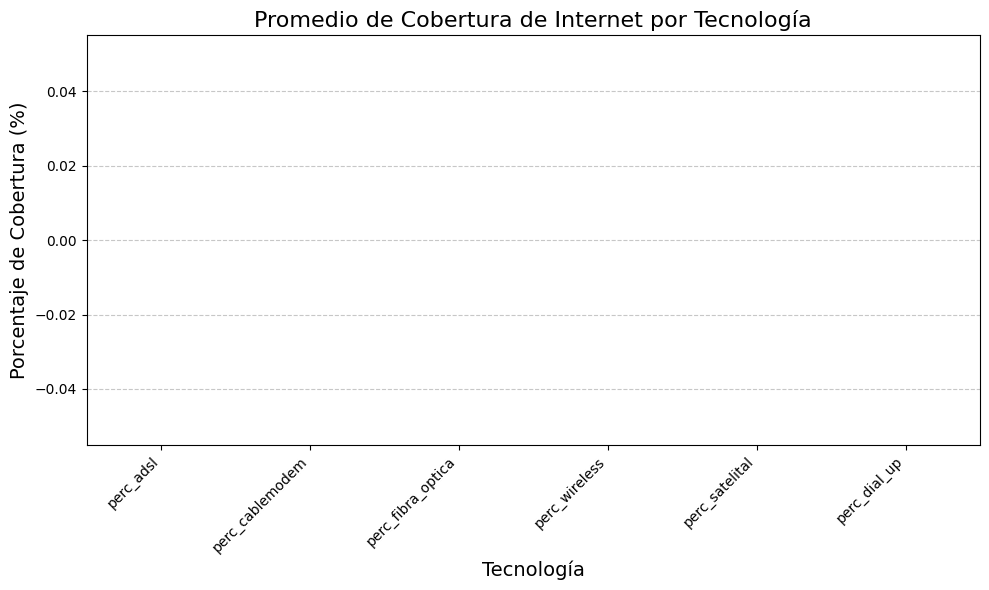

In [185]:
# Ajusta el tamaño de la figura
plt.figure(figsize=(10, 6))

# Genera el gráfico de barras
promedio_por_tecnologia.plot(kind='bar', 
                             color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'],
                             edgecolor='black')

# Configuración del título y las etiquetas
plt.title('Promedio de Cobertura de Internet por Tecnología', fontsize=16)
plt.ylabel('Porcentaje de Cobertura (%)', fontsize=14)
plt.xlabel('Tecnología', fontsize=14)

# Rotación de las etiquetas del eje X para que se vean claramente
plt.xticks(rotation=45, ha='right')

# Agrega rejilla para mejorar la legibilidad
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Muestra el gráfico
plt.tight_layout()  # Ajusta el gráfico para que todo se vea bien
plt.show()

Exporto el archivo para realizar mi KPI en el dashboard

In [186]:
# Exporto mi dataset a un archivo csv en la carpeta dataset/procesado
df_merged_final.to_csv('../datasets/procesado/acceso_velocidad_y_tecnologia_con_mapa.csv', index=False)